In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Library Model
from sklearn.tree import DecisionTreeClassifier # Baseline Model
from sklearn.ensemble import RandomForestClassifier # Machine Learning Model

# PERBAIKAN DI SINI: gunakan 'tf' bukan 'pd'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Konfigurasi
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Daftar nama kolom sesuai dokumentasi dataset Soybean Large
col_names = [
    'class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
    'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
    'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
    'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
    'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
    'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
    'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots'
]

# Path file di Google Colab
file_path = "/content/soybean-large.data"

# Load dataset (PENTING: tetap gunakan names=col_names)
df = pd.read_csv(file_path, names=col_names, header=None)

# Cek data awal
print("Shape dataset:", df.shape)
df.head()

Shape dataset: (307, 36)


,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [22]:
# Ganti '?' dengan NaN agar bisa diproses
df.replace('?', np.nan, inplace=True)

# Cek jumlah missing value per kolom
print(df.isnull().sum())

# Karena ini data kategori, kita isi missing value dengan Modus (nilai terbanyak)
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nCek kembali missing value setelah imputasi:")
print(df_imputed.isnull().sum().sum())

class               0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external-decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit-spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

Cek kembali missing value setelah imputasi:
0


In [23]:
# Pisahkan Fitur (X) dan Target (y)
X = df_imputed.drop('class', axis=1)
y = df_imputed['class']

# Encode Fitur (X) menjadi angka
# Karena fitur bersifat kategorial, kita gunakan Label Encoding untuk tiap kolom
X_encoded = X.copy()
label_encoders = {}
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Encode Target (y) menjadi angka
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

print("Jumlah data training:", X_train.shape)
print("Jumlah data testing:", X_test.shape)

Jumlah data training: (245, 35)
Jumlah data testing: (62, 35)


In [24]:
print("=== Training Baseline Model (Decision Tree) ===")
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

y_pred_base = baseline_model.predict(X_test)

print("Akurasi Baseline:", accuracy_score(y_test, y_pred_base))
print("\nClassification Report:\n", classification_report(y_test, y_pred_base))

=== Training Baseline Model (Decision Tree) ===
Akurasi Baseline: 0.9032258064516129

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.88      0.88         8
           2       0.83      1.00      0.91         5
           3       0.75      0.75      0.75         4
           4       0.50      0.50      0.50         2
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       0.75      0.60      0.67         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       1.00  

In [25]:
print("=== Training ML Model (Random Forest) ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

=== Training ML Model (Random Forest) ===
Akurasi Random Forest: 0.9193548387096774

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       0.89      1.00      0.94         8
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      0.60      0.75         5
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.88      1.00      0.93         7
          16       1.00   

=== Training Deep Learning Model ===
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.0726 - loss: 3.1361 - val_accuracy: 0.1452 - val_loss: 2.6726
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1037 - loss: 2.8030 - val_accuracy: 0.2903 - val_loss: 2.5094
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2238 - loss: 2.5532 - val_accuracy: 0.3871 - val_loss: 2.3640
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3452 - loss: 2.3544 - val_accuracy: 0.4516 - val_loss: 2.2064
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4014 - loss: 2.1832 - val_accuracy: 0.4677 - val_loss: 2.0537
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4035 - loss: 1.9868 - val_accuracy: 0.5323 - val_loss: 1.8967
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4990 - loss: 1.7770 - val_accuracy: 0.5484 - val_loss: 1.7514
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5351 - lo

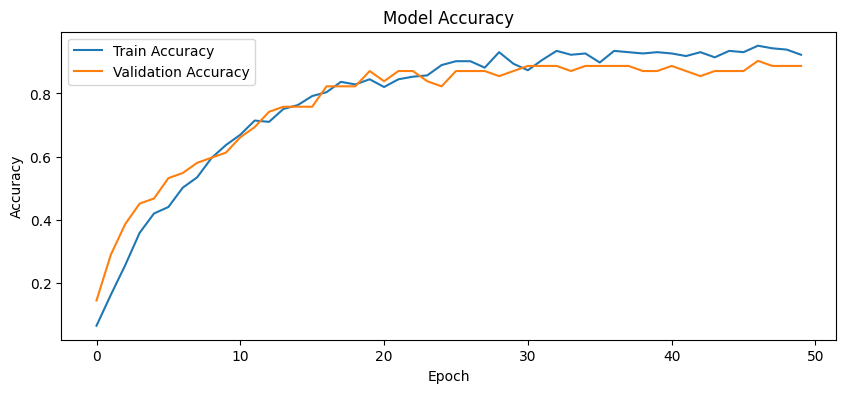

In [26]:
print("=== Training Deep Learning Model ===")

# Untuk Deep Learning, target harus dalam bentuk One-Hot Encoding (karena multikelas)
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)
num_classes = y_train_dl.shape[1]

# Membangun Arsitektur Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2)) # Mencegah overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) # Softmax untuk multiclass

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train_dl, epochs=50, batch_size=16, validation_data=(X_test, y_test_dl), verbose=1)

# Evaluasi
loss, accuracy = model.evaluate(X_test, y_test_dl)
print(f"\nAkurasi Deep Learning: {accuracy*100:.2f}%")

# Plot Training History
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()